In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
  
model = build_mlp()

In [6]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 7s 148us/step - loss: 1.9343 - acc: 0.2977 - val_loss: 1.7746 - val_acc: 0.3658
Epoch 2/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.7092 - acc: 0.3897 - val_loss: 1.6795 - val_acc: 0.4044
Epoch 3/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.6215 - acc: 0.4203 - val_loss: 1.5739 - val_acc: 0.4392
Epoch 4/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.5552 - acc: 0.4424 - val_loss: 1.5529 - val_acc: 0.4466
Epoch 5/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.5034 - acc: 0.4649 - val_loss: 1.4989 - val_acc: 0.4681
Epoch 6/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4689 - acc: 0.4751 - val_loss: 1.4550 - val_acc: 0.4856
Epoch 7/500
50000/5

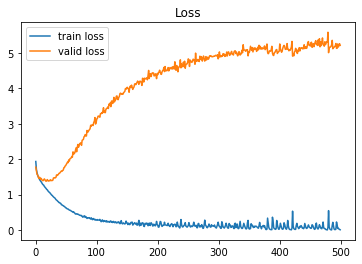

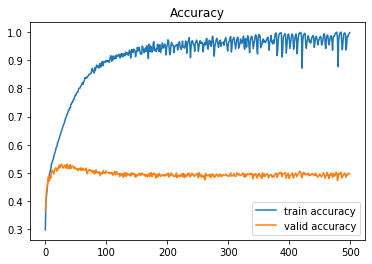

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
#SGD
from keras import optimizers

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 49us/step - loss: 1.8586 - acc: 0.3343 - val_loss: 1.8903 - val_acc: 0.3418
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.6405 - acc: 0.4189 - val_loss: 1.6716 - val_acc: 0.4060
Epoch 3/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.5478 - acc: 0.4492 - val_loss: 1.5564 - val_acc: 0.4351
Epoch 4/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.4903 - acc: 0.4708 - val_loss: 1.5736 - val_acc: 0.4318
Epoch 5/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.4400 - acc: 0.4898 - val_loss: 1.5057 - val_acc: 0.4621
Epoch 6/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.4004 - acc: 0.5023 - val_loss: 1.5188 - val_acc: 0.4547
Epoch 7/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.3647 - acc: 0.5161 - val_loss: 1.4818 - 

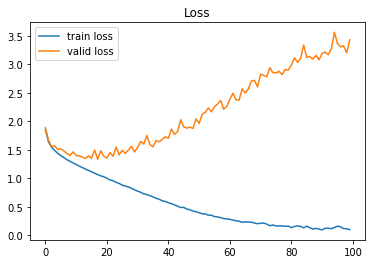

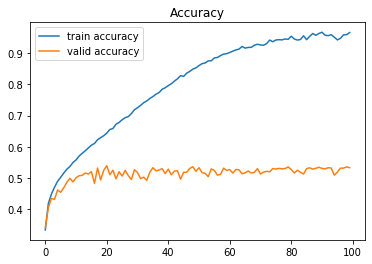

In [12]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()